In [ ]:
#importing packages

import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
from numpy import asarray
from sklearn.preprocessing import OrdinalEncoder
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
import math
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [ ]:
#loading dataset

data=pd.read_excel('ML_Lab4.xlsx')

data #printing data

,age,income,student,credit_rating,buys_computer
0,<=30,high,no,fair,no
1,<=30,high,no,excellent,no
2,31...40,high,no,fair,yes
3,>40,medium,no,fair,yes
4,>40,low,yes,fair,yes
5,>40,low,yes,excellent,no
6,31...40,low,yes,excellent,yes
7,<=30,medium,no,fair,no
8,<=30,low,yes,fair,yes
9,>40,medium,yes,fair,yes


In [ ]:
# Defining a function to calculate entropy for a given attribute
def calculate_entropy(attribute_values):
    entropy = 0
    total_instances = len(attribute_values)

    for category, count in attribute_values.value_counts().items():
        probability = count / total_instances
        entropy -= probability * math.log2(probability)

    return entropy

# Defining a function to calculate Information Gain
def calculate_information_gain(attribute_name, class_label):
    # Calculating the entropy of the entire dataset
    total_entropy = calculate_entropy(data[class_label])

    # Calculating the weighted average entropy after splitting on the attribute
    weighted_entropy = 0
    total_instances = len(data)

    for category, subset in data.groupby(attribute_name):
        probability = len(subset) / total_instances
        subset_entropy = calculate_entropy(subset[class_label])
        weighted_entropy += probability * subset_entropy

    # Calculating Information Gain
    information_gain = total_entropy - weighted_entropy

    return information_gain

best_attribute = None
lowest_entropy = float('inf')

for column in data.columns[:-1]:
    if data[column].dtype == 'object':
        entropy = calculate_entropy(data[column])
        print("Entropy of " + column + ": " + str(entropy))

        # Checking if this attribute has lower entropy than the current lowest entropy
        if entropy < lowest_entropy:
            lowest_entropy = entropy
            best_attribute = column

print("\nBest attribute for the first split: " + best_attribute)

best_attribute = None
highest_information_gain = -1

for column in data.columns[:-1]:
    if data[column].dtype == 'object':
        information_gain = calculate_information_gain(column, 'buys_computer')
        print("Information Gain of " + column + ": " + str(information_gain))

        # Checking if this attribute has higher Information Gain than the current highest
        if information_gain > highest_information_gain:
            highest_information_gain = information_gain
            best_attribute = column

print("\nBest attribute for the root node: " + best_attribute)


Entropy of age: 1.5774062828523454
Entropy of income: 1.5566567074628228
Entropy of student: 1.0
Entropy of credit_rating: 0.9852281360342515

Best attribute for the first split: credit_rating
Information Gain of age: 0.24674981977443933
Information Gain of income: 0.02922256565895487
Information Gain of student: 0.15183550136234159
Information Gain of credit_rating: 0.04812703040826949

Best attribute for the root node: age


In [ ]:
data = pd.DataFrame({'age_range': ['31...40', '41...50', '21...30', '31...40'],
                     'buys_computer': [1, 0, 0, 1]})

# Separate features (X) and target (y)
X = data.drop(columns=['buys_computer'])
y = data['buys_computer']

# Initializing the OrdinalEncoder to convert datatype
encoder = OrdinalEncoder()

# Transforming the 'age_range' column
X['age_range'] = encoder.fit_transform(X[['age_range']])

# Spliting the dataset into training and testing sets
Tr_X, Te_X, Tr_y, Te_y = train_test_split(X, y, test_size=0.2, random_state=42)

# Fitting the Decision Tree model
model = DecisionTreeClassifier()
model.fit(Tr_X, Tr_y)

training_accuracy = model.score(Tr_X, Tr_y)
print("Training Set Accuracy:", training_accuracy)

tree_depth = model.get_depth()
print("Tree Depth:", tree_depth)


Training Set Accuracy: 1.0
Tree Depth: 1


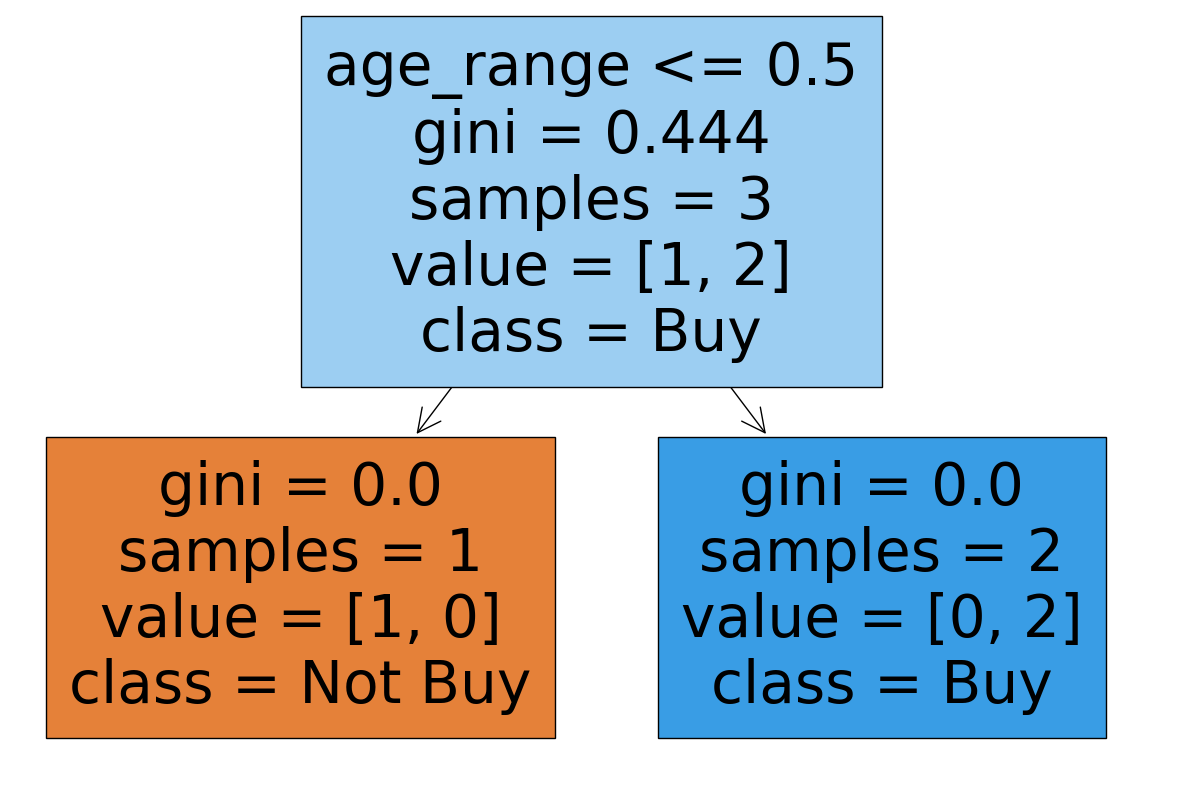

In [ ]:
# Setting the figure size for the plot
plt.figure(figsize=(15, 10))

# Decision Tree Plot
plot_tree(model, filled=True, feature_names=X.columns, class_names=['Not Buy', 'Buy'])

plt.show()

In [ ]:
df = pd.read_csv('Parkisons Dataset 1 Final.csv')
df

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,phon_R01_S50_2,174.188,230.978,94.261,0.00459,0.00003,0.00263,0.00259,0.00790,0.04087,...,0.07008,0.02764,19.517,0,0.448439,0.657899,-6.538586,0.121952,2.657476,0.133050
191,phon_R01_S50_3,209.516,253.017,89.488,0.00564,0.00003,0.00331,0.00292,0.00994,0.02751,...,0.04812,0.01810,19.147,0,0.431674,0.683244,-6.195325,0.129303,2.784312,0.168895
192,phon_R01_S50_4,174.688,240.005,74.287,0.01360,0.00008,0.00624,0.00564,0.01873,0.02308,...,0.03804,0.10715,17.883,0,0.407567,0.655683,-6.787197,0.158453,2.679772,0.131728
193,phon_R01_S50_5,198.764,396.961,74.904,0.00740,0.00004,0.00370,0.00390,0.01109,0.02296,...,0.03794,0.07223,19.020,0,0.451221,0.643956,-6.744577,0.207454,2.138608,0.123306


Training Set Accuracy: 1.0
Test Set Accuracy: 0.9230769230769231


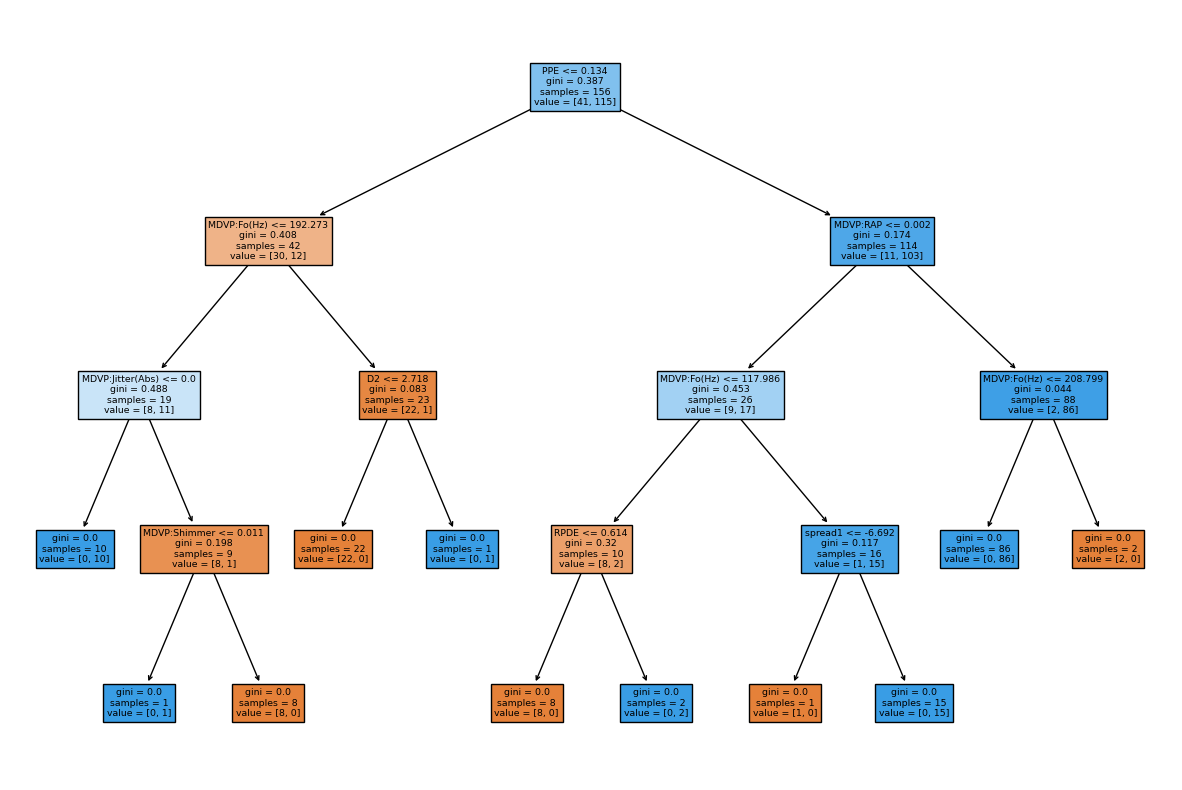

In [ ]:
# Separate features (X) and target (y)
X = df.drop(columns=['status','name'])
y = df['status']

# Splitting the dataset into training and testing sets
Tr_X, Te_X, Tr_y, Te_y = train_test_split(X, y, test_size=0.2, random_state=42)

# Fitting the Decision Tree model
model = DecisionTreeClassifier()
model.fit(Tr_X, Tr_y)

# Calculating the training set and test set accuracy
training_accuracy = model.score(Tr_X, Tr_y)
print("Training Set Accuracy:", training_accuracy)

test_accuracy = model.score(Te_X, Te_y)
print("Test Set Accuracy:", test_accuracy)

# Decision Tree Plot
plt.figure(figsize=(15, 10))
plot_tree(model, filled=True, feature_names=X.columns)
plt.show()


Training Set Accuracy (max_depth=5): 100.00%
Test Set Accuracy (max_depth=5): 92.31%


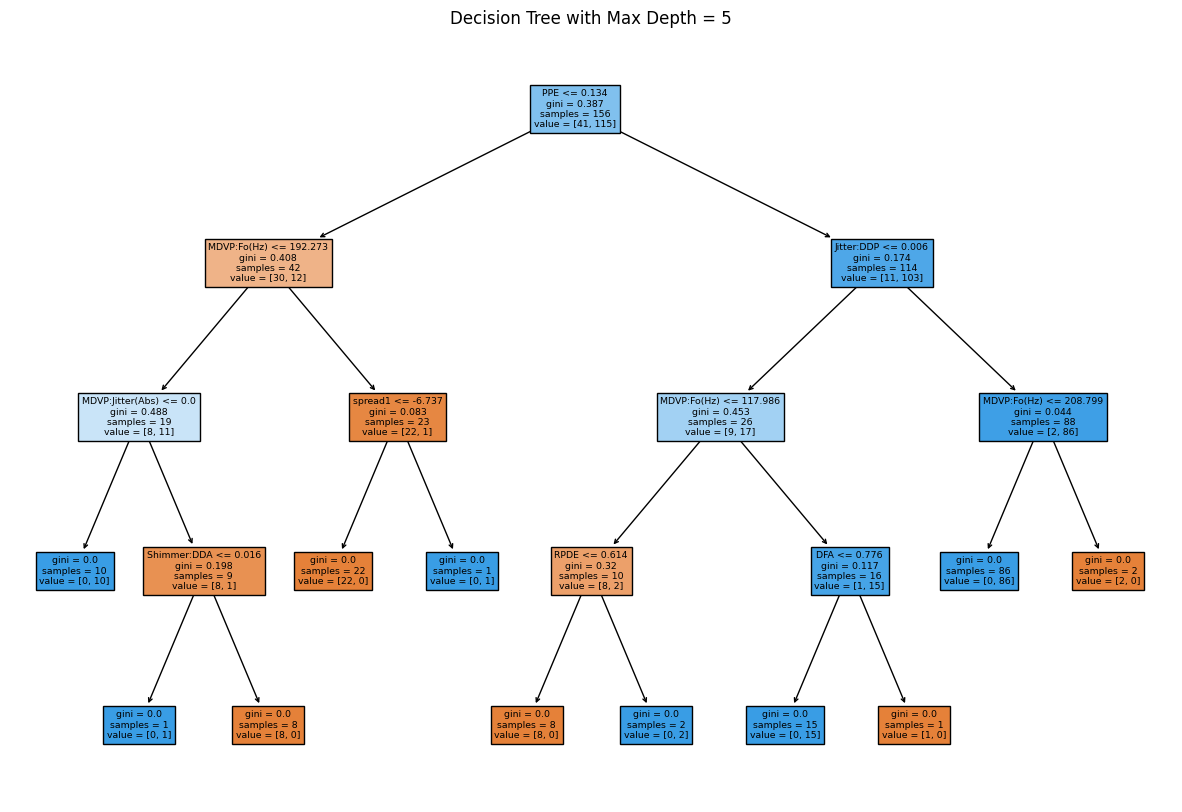

In [ ]:
# Separate features (X) and target (y)
X = df.drop(columns=['status','name'])
y = df['status']

# Splitting the dataset into training and testing sets
Tr_X, Te_X, Tr_y, Te_y = train_test_split(X, y, test_size=0.2, random_state=42)

# Fitting the Decision Tree model with max_depth constraint
max_depth = 5
model = DecisionTreeClassifier(max_depth=max_depth)
model.fit(Tr_X, Tr_y)

# Calculating the training set and test set accuracy
training_accuracy = model.score(Tr_X, Tr_y)
print("Training Set Accuracy (max_depth=" + str(max_depth) + "): " + "{:.2f}%".format(training_accuracy * 100))

test_accuracy = model.score(Te_X, Te_y)
print("Test Set Accuracy (max_depth=" + str(max_depth) + "): " + "{:.2f}%".format(test_accuracy * 100))

# Decision Tree with max_depth constraint Plot
plt.figure(figsize=(15, 10))
plot_tree(model, filled=True, feature_names=X.columns)
plt.title("Decision Tree with Max Depth = {}".format(max_depth))
plt.show()

efgtg Training Set Accuracy (Entropy Criterion): 100.00%
efgtg Test Set Accuracy (Entropy Criterion): 92.31%


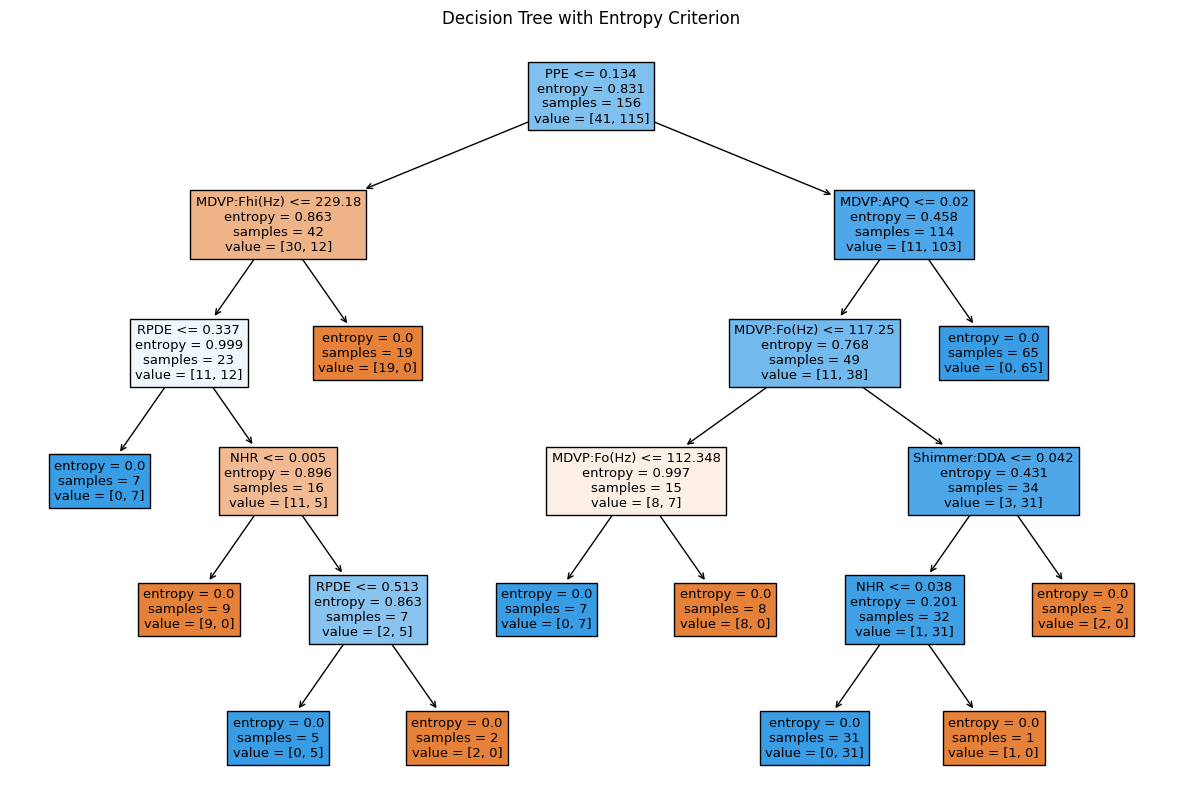

In [ ]:
# Fitting the Decision Tree model with "entropy" criterion
model_entropy = DecisionTreeClassifier(criterion="entropy")
model_entropy.fit(Tr_X, Tr_y)

# Calculating the training set and test set accuracy for entropy criterion
training_accuracy_entropy = model_entropy.score(Tr_X, Tr_y)
print("efgtg Training Set Accuracy (Entropy Criterion): {:.2f}%".format(training_accuracy_entropy * 100))

# Calculating and printing test set accuracy with the entropy criterion
print("efgtg Test Set Accuracy (Entropy Criterion): {:.2f}%".format(test_accuracy_entropy * 100))



# Decision Tree with entropy Plot
plt.figure(figsize=(15, 10))
plot_tree(model_entropy, filled=True, feature_names=X.columns)
plt.title("Decision Tree with Entropy Criterion")
plt.show()

In [ ]:
# Fitting a Decision Tree classifier
decision_tree_classifier = DecisionTreeClassifier(random_state=42)
decision_tree_classifier.fit(Tr_X, Tr_y)

# Making predictions on the test set using the Decision Tree classifier
decision_tree_predictions = decision_tree_classifier.predict(Te_X)

# Calculating accuracy and other performance metrics for the Decision Tree
decision_tree_accuracy = accuracy_score(Te_y, decision_tree_predictions)
decision_tree_report = classification_report(Te_y, decision_tree_predictions, output_dict=True)

print("Decision Tree Classifier Performance:")
print("Accuracy:", decision_tree_accuracy)
print("Classification Report:")
print("Precision:", decision_tree_report['1']['precision'])
print("Recall:", decision_tree_report['1']['recall'])
print("F1 Score:", decision_tree_report['1']['f1-score'])

# Fitting a Random Forest classifier
random_forest_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest_classifier.fit(Tr_X, Tr_y)

# Making predictions on the test set using the Random Forest classifier
random_forest_predictions = random_forest_classifier.predict(Te_X)

# Calculating accuracy and other performance metrics for the Random Forest
random_forest_accuracy = accuracy_score(Te_y, random_forest_predictions)
random_forest_report = classification_report(Te_y, random_forest_predictions, output_dict=True)

print("\nRandom Forest Classifier Performance:")
print("Accuracy:", random_forest_accuracy)
print("Classification Report:")
print("Precision:", random_forest_report['1']['precision'])
print("Recall:", random_forest_report['1']['recall'])
print("F1 Score:", random_forest_report['1']['f1-score'])


Decision Tree Classifier Performance:
Accuracy: 0.9230769230769231
Classification Report:
Precision: 0.9393939393939394
Recall: 0.96875
F1 Score: 0.9538461538461539

Random Forest Classifier Performance:
Accuracy: 0.9487179487179487
Classification Report:
Precision: 0.9411764705882353
Recall: 1.0
F1 Score: 0.9696969696969697
